
# Векторні представлення слів: кодування лексичної семантики

## 🔍 З чого все починається?

У NLP (обробці природної мови) наші основні ознаки — це... **слова!**  
Але як навчити комп'ютер розуміти значення слова? 🤔

Можна розглядати слово просто як рядок (ASCII), але це лише "як воно виглядає", а **не те, що воно означає** - компʼютер з рядкового представлення цього не розуміє! І як, скажімо, об'єднати значення двох слів або порівняти їх?



## 🧱 One-hot encoding: базовий підхід

Перший інтуїтивний підхід — **one-hot encoding**.

Уявіть, що у нас є словник $V$ зі 10000 слів. Тоді кожне слово кодується вектором з 10000 елементів:

$$
\overbrace{[ 0, 0, \dots, 1, \dots, 0 ]}^{|V| \text{ елементів}}
$$

Одиничка стоїть на місці, яке відповідає слову $w$.

**Але…**

- ❌ **Немає жодного зв'язку між словами.** Всі вони "унікальні сніжинки".
- ❌ **Дуже розріджене і неефективне представлення.**



## 🧠 Навіщо нам семантична схожість між словами?

Уявімо, що ми навчаємо мовну модель. І в нашому навчальному корпусі були такі речення:

- _Математик читає наукову статтю._
- _Фізик читає наукову статтю._
- _Математик готує доповідь на конференцію._

А тепер у нас з’являється нове речення, яке модель раніше **ніколи не бачила**:

- _Фізик готує доповідь на конференцію._

Модель, можливо, частково зможе впоратись із ним.  
Але хіба не було б краще, якби вона могла використати логіку:

1. Ми вже бачили, що **математик** і **фізик** з’являлися в **тому самому контексті** — обидва читають наукові статті.
2. Ми вже бачили, як **математик** “готував доповідь на конференцію”.
3. Значить, **фізик** цілком логічно підходить до цієї ж дії!

📌 Це — **семантична схожість**: комп’ютер “здогадується”, що ці два слова мають схожі властивості, бо з’являються в подібних контекстах.

---

Це не про те, що слова *пишуться схоже* чи мають *однакові корені*.  
Це про те, **як вони поводяться в мові** — в яких ситуаціях з’являються.

> Так ми боремось із **розрідженістю мовних даних** — навчаємось робити висновки про нове, спираючись на вже відоме.

І все це базується на [**гіпотезі розподільної семантики**](https://en.wikipedia.org/wiki/Distributional_semantics):
> _Слова, які вживаються в подібних контекстах — мають подібне значення._

![](https://upload.wikimedia.org/wikipedia/commons/c/ce/Distributional_semantics.png)

На картинці зображено як слова розміщуються у семантичному просторі на основі контекстів, у яких вони вживаються.

Семантичний простір — це математично векторний простір, де близькі за значенням слова мають схожі координати.

## 🧠 Ідея: описати слова через семантичні атрибути

Уявімо, що кожне слово має набір деяких семантичних ознак (ознак за сенсом цього явища чи обʼєкту):

- "може бігати" 🏃
- "працює в офісі" ☕
- "займається наукою" 🧪

І кожне слово отримає **вектор** в просторі цих ознак:


$$q_\text{математик} = \left[ \overbrace{2.3}^\text{може бігати},
\overbrace{9.4}^\text{працює в офісі}, \overbrace{-5.5}^\text{спеціалізувався на фізиці}, \dots \right]$$

$$q_\text{фізик} = \left[ \overbrace{2.5}^\text{може бігати},
\overbrace{9.1}^\text{працює в офісі}, \overbrace{6.4}^\text{спеціалізувався на фізиці}, \dots \right]$$



## 📏 Як вимірюємо схожість?

Спочатку можна просто взяти скалярний добуток:

$$
\text{Схожість}(\text{фізик}, \text{математик}) = q_\text{фізик} \cdot q_\text{математик}
$$

Але частіше використовують **косинусальну схожість**:

$$
\text{Схожість} = \frac{q_\text{фізик} \cdot q_\text{математик}}{\|q_\text{фізик}\| \cdot \|q_\text{математик}\|} = \cos(\phi)
$$

де $\phi$ — кут між векторами.  
- Кут ≈ 0 → косинус ≈ 1 → **дуже схожі** ✅  
- Кут ≈ 180° → косинус ≈ -1 → **протилежні** ❌


Ще приклади візуально:
![](https://towardsdatascience.com/wp-content/uploads/2022/12/0-Jd2-SADPkMgIk4r.png)

Часто наводять наступні семантичні приклади, коли `king` - `man` + `woman` = `king`.  Та інші:

![](https://drive.google.com/uc?id=1XXSleWjERwjJUOSUAPzRIhxuE7g51pU1)

## 🔄 Чим відрізняються такі представлення від one-hot?

One-hot encoding:
- дуже довгі і розріджені вектори (розмірність 10-30k елемнетів)
- **не кодують жодної інформації про значення**
- косинусальна схожість між будь-якими двома різними словами = 0

Embeddings (векторні уявлення):
- **щільні** вектори (розмірність зазвичай 100-300, мають значення за кожним виміром, а не лише в 1 колонці)
- **відображають семантичну близькість**
- можуть бути побудовані в результаті тренування нейромережі 🧠


## 🤖 Як отримати такі вектори?

Ми не хочемо вручну придумувати, що означає кожна координата.

💡 Рішення: **дати моделі самій навчитися**, які атрибути важливі для представлення слів!

> Векторні представлення стають **параметрами моделі** і змінюються під час навчання.

Вони можуть бути неінтерпретованими — тобто ми не знаємо, що означає “n-ий вимір”, але ми знаємо:  
_фізик і математик мають подібні значення в ньому_ — отже, вони **семантично близькі**.


## ✅ Висновок

**Векторні представлення слів (embeddings)**:
- кодують _значення слова_, а не лише його ідентифікатор
- допомагають **узагальнювати**, навіть якщо слово не було в конкретному контексті раніше
- є основою сучасного NLP 🔥


## Підходи до побудови Word Embeddings

Розглянемо популярний найпростіший і поширений підхід до побудови Word Embeddings - word2vec.

word2vec не є єдиним алгоритмом, а скоріше сімейством архітектур моделей, які можуть бути використані для навчання векторних представлень слів з великих наборів даних. Векторні представлення, отримані за допомогою word2vec, виявилися успішними в різноманітних завданнях обробки природної мови.

Наукові пейпери з цієї теми:
-  [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf)
- [Distributed Representations of Words and Phrases and their Compositionality](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)

Ці статті запропонували два методи для навчання представлень слів:

*   **Continuous bag-of-words model**: передбачає середнє слово на основі навколишніх контекстних слів. Контекст складається з кількох слів перед і після поточного (середнього) слова. Ця архітектура називається моделлю "мішка слів", оскільки порядок слів у контексті не має значення.

![](https://drive.google.com/uc?id=19D-Q_HP4UrQO8XZQqivD1YLvLqYFEaTq)
![](https://drive.google.com/uc?id=1UT5-S4qYcAEUWx8NNsTxJu24SxFVGaL8)

*   **Continuous skip-gram model**: передбачає слова в певному діапазоні перед і після поточного слова в тому ж реченні. Приклад роботи цього методу наведено нижче.
![](https://drive.google.com/uc?id=1BqE9895r9e0XYfVb75f2LX67bLs867Qc)
![](https://drive.google.com/uc?id=1G1Zzud9IJgZDZ9YoWTURf3XjkJTbrGRI)



In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)  # Встановлення початкового значення для генератора випадкових чисел

Як кодуються дані:
![](https://towardsdatascience.com/wp-content/uploads/2021/09/1-6th97Wit9XDnseZUNSuCg-1536x434.png)

Ось так ми будемо визначати ембединги. Зарвз вони ініційовані випадковим чином, але ми будемо їх вивчати.

In [ ]:
word_to_ix = {"hello": 0, "world": 1}
embeds = nn.Embedding(2, 5)  # 2 слова у словнику, 5-вимірні векторні представлення
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
print(hello_embed)

tensor([[ 0.6614,  0.2669,  0.0617,  0.6213, -0.4519]],
       grad_fn=<EmbeddingBackward0>)


## Приклад імплементації CBOW-like моделі

Тут представлений концепт моделі. Репрезентації тут не вийшли якісними (слова, які мали б бути подібними по кос. відстані - такими не є). Робоча гіпотеза чому: бо тут настільки жорсткий оверфіт моделі, що їй не обовʼязково будувати подібні вектори для `cat` та `dog` наприклад :)

Тим не менш цей приклад показує як концептуально тренується подібна модель. Можете експериментувати з різними гіперпараметрами - подивитись, що буде :)

**Порівняно з відео під час лекції тут змінено `EMBEDDING_DIM` і дещо спрощена архітектура моделі для тестування (і навіть спрощена архітектура оверфітиться на цьому маленькому наборі даних і не вчить якісні репрезентації).**

Висновок: якщо тренуєте ембединги, треба все ж достатньо великий набір даних.

In [ ]:
EMBEDDING_DIM = 5

In [ ]:
corpus = [
    "the cat sat on the mat",
    "the cat sat on the rug",
    "the dog sat on the rug",
    "the cat played with the yarn",
    "the dog barked at the cat",
    "the cat chased the mouse",
    "the dog chased the ball"
]

In [ ]:
train_ds = []

CONTEXT_SIZE = 2  # по 2 слова ліворуч і праворуч

for sentence in corpus:
    words = sentence.split()
    for i in range(len(words)):
        center = words[i]
        context = []

        # проходимо по контекстному вікну
        for j in range(-CONTEXT_SIZE, CONTEXT_SIZE + 1):
            if j == 0:
                continue  # пропускаємо центр
            if 0 <= i + j < len(words):
                context.append(words[i + j])

        if context:
            train_ds.append((context, center))

# 📌 Приклад виводу
for pair in train_ds[:5]:
    print(pair)


(['cat', 'sat'], 'the')
(['the', 'sat', 'on'], 'cat')
(['the', 'cat', 'on', 'the'], 'sat')
(['cat', 'sat', 'the', 'mat'], 'on')
(['sat', 'on', 'mat'], 'the')


In [ ]:
# лишаємо лише набори, де є контекст з 4х слів
train_ds = [pair for pair in train_ds if len(pair[0]) == CONTEXT_SIZE * 2]

In [ ]:
train_ds[:3]

[(['the', 'cat', 'on', 'the'], 'sat'),
 (['cat', 'sat', 'the', 'mat'], 'on'),
 (['the', 'cat', 'on', 'the'], 'sat')]

In [ ]:
all_words = []
for sentence in corpus:
    all_words.extend(sentence.split())

vocab = list(set(all_words))
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [ ]:
word_to_ix

{'mouse': 0,
 'chased': 1,
 'barked': 2,
 'played': 3,
 'sat': 4,
 'with': 5,
 'mat': 6,
 'at': 7,
 'on': 8,
 'cat': 9,
 'rug': 10,
 'ball': 11,
 'yarn': 12,
 'dog': 13,
 'the': 14}

In [ ]:
class CBOWModel(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOWModel, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(context_size * 2 * embedding_dim, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = self.linear(embeds)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

Epoch 100/200| Loss 0.0016393313326261705


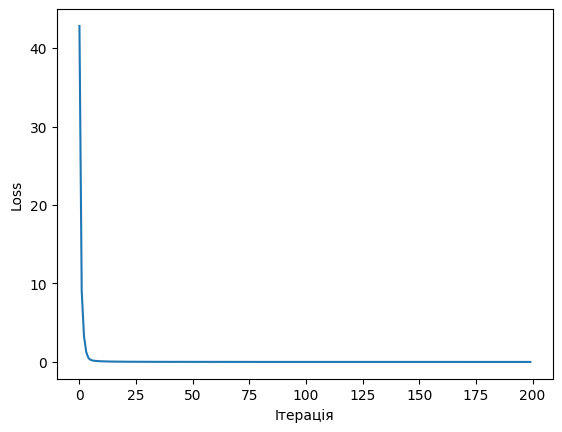

In [ ]:
N_EPOCHS = 200
losses = []
loss_function = nn.NLLLoss()
model = CBOWModel(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.Adam(model.parameters(), lr=0.05)

for epoch in range(N_EPOCHS):
    if epoch % 100 == 0 and epoch!=0:
        print(f"Epoch {epoch}/{N_EPOCHS}| Loss {losses[-1]}")
    total_loss = 0
    for context, target in train_ds:
        # Крок 1. Підготуйте вхідні дані для передачі в модель (тобто перетворіть слова
        # у цілі індекси та обгорніть їх у тензори)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)

        # Крок 2. Пам'ятайте, що torch *накопичує* градієнти. Перед передачею
        # нового екземпляра потрібно обнулити градієнти від старого
        # екземпляра
        model.zero_grad()

        # Крок 3. Виконайте прямий прохід, отримуючи логарифмічні ймовірності наступних
        # слів
        log_probs = model(context_idxs)

        # Крок 4. Обчисліть функцію втрат. (Знову ж таки, Torch хоче, щоб цільове
        # слово було обгорнуте в тензор)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]]))

        # Крок 5. Виконайте зворотний прохід і оновіть градієнт
        loss.backward()
        optimizer.step()

        # Отримайте число Python з 1-елементного тензора, викликавши tensor.item()
        total_loss += loss.item()
    losses.append(total_loss)

# Втрата зменшувалася з кожною ітерацією над навчальними даними!
plt.plot(losses)
plt.xlabel('Ітерація')
plt.ylabel('Loss');

In [ ]:
losses[-1]

0.00039743486831866903

Перевіряємо роботу моделі:

In [ ]:
train_ds

[(['the', 'cat', 'on', 'the'], 'sat'),
 (['cat', 'sat', 'the', 'mat'], 'on'),
 (['the', 'cat', 'on', 'the'], 'sat'),
 (['cat', 'sat', 'the', 'rug'], 'on'),
 (['the', 'dog', 'on', 'the'], 'sat'),
 (['dog', 'sat', 'the', 'rug'], 'on'),
 (['the', 'cat', 'with', 'the'], 'played'),
 (['cat', 'played', 'the', 'yarn'], 'with'),
 (['the', 'dog', 'at', 'the'], 'barked'),
 (['dog', 'barked', 'the', 'cat'], 'at'),
 (['the', 'cat', 'the', 'mouse'], 'chased'),
 (['the', 'dog', 'the', 'ball'], 'chased')]

Тестовий екземпляр:

In [ ]:
context = ['the', 'dog', 'the', 'ball']
context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)

In [ ]:
ix_to_word = {ix: word for word, ix in word_to_ix.items()}

In [ ]:
[ix_to_word[idx.item()] for idx in context_idxs]

['the', 'dog', 'the', 'ball']

In [ ]:
ix_to_word[torch.exp(model(context_idxs)).argmax(dim=1).item()]

'chased'

In [ ]:
torch.exp(model(context_idxs)).detach().numpy().round(3)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
vocab

['mouse',
 'chased',
 'barked',
 'played',
 'sat',
 'with',
 'mat',
 'at',
 'on',
 'cat',
 'rug',
 'ball',
 'yarn',
 'dog',
 'the']

Оверфіт є, але репрезентації як далі побачимо - так собі :)

In [ ]:
# Щоб отримати ембединг конкретного слова, наприклад, "cat"
print(model.embeddings.weight[word_to_ix["cat"]])

tensor([ 2.1397, -2.7706,  1.3340,  0.6785, -3.2196],
       grad_fn=<SelectBackward0>)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.graph_objs as go

word_vectors = model.embeddings.weight.detach().numpy()

# Використовуємо PCA для зменшення розмірності до 2D
pca = PCA(n_components=3)
reduced = pca.fit_transform(word_vectors)

fig = go.Figure(data=[go.Scatter3d(
    x=reduced[:, 0],
    y=reduced[:, 1],
    z=reduced[:, 2],
    mode='markers+text',
    text=list(word_to_ix.keys()),
    textposition="top center",
    marker=dict(
        size=6,
        color='skyblue',
        opacity=0.8
    )
)])

fig.update_layout(
    title="📌 3D Word Embeddings Visualization",
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3"
    )
)

fig.show()


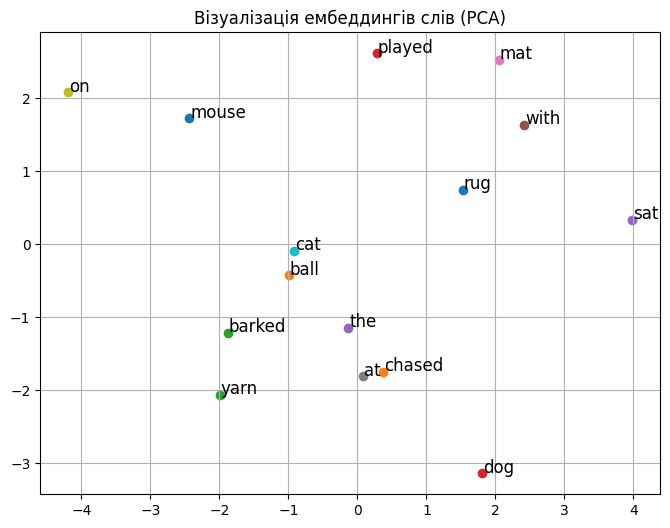

In [ ]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
for i, label in enumerate(word_to_ix.keys()):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, label, fontsize=12)

plt.title("Візуалізація ембеддингів слів (PCA)")
plt.grid(True)
plt.show();

Знайдемо найближчі вектори до заданого.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

ix_to_word = {ix: word for word, ix in word_to_ix.items()}

def most_similar(word, vectors, word_to_ix, topn=5):
    idx = word_to_ix[word]
    query = vectors[idx].reshape(1, -1)
    sims = cosine_similarity(query, vectors)[0]
    sorted_ix = np.argsort(-sims)
    return [(ix_to_word[i], sims[i]) for i in sorted_ix[1:topn+1]]

most_similar("cat", word_vectors, word_to_ix)

[('ball', np.float32(0.9319499)),
 ('mouse', np.float32(0.34799284)),
 ('on', np.float32(0.29517227)),
 ('rug', np.float32(0.15233193)),
 ('the', np.float32(0.068004675))]

Це не те, що ми б очікували. Але причина, що репрезентації тут не вивчились - бо модель просто запамʼятала всі відповіді і їй не треба бути розумною :)

2 cтатті, де детальніше описано про імплементацію пейперу word2vec:

- Імплементація двох зазначених вище пейперів: https://towardsdatascience.com/implementing-word2vec-in-pytorch-from-the-ground-up-c7fe5bf99889/

- Імплементація першого пейпера, більш зрозуміла структура нейронних мереж: https://towardsdatascience.com/word2vec-with-pytorch-implementing-original-paper-2cd7040120b0/


## 🧠 Інші підходи до побудови ембеддингів: GloVe і FastText

Після Word2Vec з'явилося ще багато потужних методів для побудови векторних представлень слів. Серед найвідоміших — **GloVe** та **FastText**.

---

### 📦 GloVe (Global Vectors for Word Representation)

#### 🔍 Ідея
- GloVe поєднує ідеї Word2Vec та статистики співзустрічей слів (co-occurrence).
- Будується **матриця співзустрічей** слів у контексті, а потім **факторизується** (розкладається на добуток матриць), щоб отримати вектори.
- GloVe не намагається передбачити слово, як Word2Vec, а навпаки — **навчається від глобальної структури корпусу**.

Факторизація матриці — це розкладання великої матриці на кілька менших, простіших.
Це схоже на те, як число 12 можна розкласти як 3 × 4 — так і матрицю можна розкласти на добуток інших матриць.

У задачах на кшталт GloVe ми будуємо велику матрицю співзустрічей слів, де кожна клітинка показує, як часто слово i зустрічалося поруч зі словом j.

👉 Факторизація цієї матриці дозволяє:
- зменшити розмірність
- отримати щільні векторні представлення слів
- зберегти найважливіші зв’язки між словами

**Важливий нюанс цієї моделі - вона навчається офлайн. Що це значить?**

- Word2Vec:
модель проходить через корпус, дивиться на одне слово і контекст, робить апдейт ваг → переходить до наступного прикладу → і так далі (онлайн - "на льоту" - навчання ітеративне).

- GloVe:
спочатку рахуємо всі співзустрічі слів у всьому корпусі → будуємо матрицю → оптимізуємо функцію втрат над нею → навчаємо все одразу (офлайн). Тобто якщо ми хочемо довчити модель - треба перераховувати всю матрицю співзустрічей слів :)

#### 📄 Пейпер:
📘 *GloVe: Global Vectors for Word Representation*  
Stanford NLP Group (2014)  
🔗 [https://aclanthology.org/D14-1162.pdf](https://aclanthology.org/D14-1162.pdf)

#### 💻 Репозиторій:
🔗 GitHub: [https://github.com/stanfordnlp/GloVe](https://github.com/stanfordnlp/GloVe)

#### 📌 Характеристики:
- Навчається офлайн (не онлайн як Word2Vec)
- Працює швидко і стабільно
- Часто використовують попередньо навчені GloVe-ембеддинги (на Wikipedia або Common Crawl)

Класна стаття з поясненням про Word2Vec та Glove:
https://jonathan-hui.medium.com/nlp-word-embedding-glove-5e7f523999f6

---

### ⚡ FastText (від Facebook AI)

#### 🔍 Ідея
- FastText — це розширення Word2Vec, яке **враховує морфологію** слів.
- Кожне слово представляється як сума векторів **n-грамів символів**, наприклад:
  
  `where → <wh, whe, her, ere, re>`

- Це дозволяє моделі:
  - працювати з **новими словами** (out-of-vocabulary)
  - краще вловлювати **семантику словоформ**, суфіксів, префіксів тощо

#### 📄 Пейпер:
📘 *Enriching Word Vectors with Subword Information*  
Facebook AI Research (FAIR), 2016  
🔗 [https://aclanthology.org/E17-2025.pdf](https://aclanthology.org/E17-2025.pdf)

#### 💻 Репозиторій:
🔗 GitHub: [https://github.com/facebookresearch/fastText](https://github.com/facebookresearch/fastText)

#### 📌 Характеристики:
- Чудово працює для мов зі складною морфологією - тобто різними відмінками і формами слів (українська, польська, угорська…)
- Має офіційні попередньо навчені ембеддинги для **157 мов**
- Швидкий і легко інтегрується

---

## 🤖 Порівняння Word2Vec, GloVe, FastText

| Характеристика      | Word2Vec        | GloVe             | FastText                   |
|---------------------|-----------------|-------------------|----------------------------|
| Підхід              | Передбачення    | Статистика        | Передбачення + n-грами     |
| Навчання            | Онлайн          | Офлайн            | Онлайн                     |
| Морфологія          | ❌              | ❌                | ✅                         |
| OOV-слова           | ❌              | ❌                | ✅                         |
| Вектор слова        | Один вектор     | Один вектор       | Сума векторів n-грамів     |

---

### Поради для використання:
- Використовуйте **FastText**, якщо працюєте з **рідкісними словами або морфологічно багатими мовами**.
- Якщо потрібно щось **легке і швидке** — беріть **GloVe**.
- Word2Vec все ще хороший вибір для навчання на своїх даних з нуля.

**Але увага!** Всі ці методи вже доволі застарілі і в сучасності частіше використовують BERT-embeddings (безкоштовно), або ембединги великих мовних моделей, наприклад, розробок OpenAI (платно).


## Використання готових натренованих векторів

Давайте глянемо тим не менш, як ви можете використовувати натреновані ембедінги.

Запустимо приклад word2vec звідси:
https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

In [ ]:
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.2 --force-reinstall --no-cache-dir --quiet

Завантажуємо ембединги. Це займає певний час (кілька хвилин).

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


Переглянемо словник завантаженої моделі:

In [ ]:
for index, word in enumerate(wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(wv.index_to_key)} is {word}")

word #0/3000000 is </s>
word #1/3000000 is in
word #2/3000000 is for
word #3/3000000 is that
word #4/3000000 is is
word #5/3000000 is on
word #6/3000000 is ##
word #7/3000000 is The
word #8/3000000 is with
word #9/3000000 is said


Ось так можемо отримати вектор певного заданого слова:

In [ ]:
vec_king = wv['king']

In [ ]:
len(vec_king)

300

Можна завантажити найближчі слова до певного слова:

In [ ]:
wv.most_similar("king")

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

Перевірити, які методи є у wv:

In [ ]:
# help(wv)

Але ця модель нам не дасть вектор слова, якого вона не бачила - це проблема:

In [ ]:
try:
    vec_cameroon = wv['cameroon']
except KeyError:
    print("The word 'cameroon' does not appear in this model")

The word 'cameroon' does not appear in this model


Також в цій моделі є функціонал, який дозволяє порівнювати слова між собою:

In [ ]:
pairs = [
    ('car', 'minivan'),
    ('car', 'bicycle'),
    ('car', 'airplane'),
    ('car', 'cereal'),
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


Можемо перевірити, яке зі слів не підходить до послідовності:

In [ ]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


Перевіримо як розташуються в просторі вектори наших слів з попереднього прикладу.

In [ ]:
vocab

['on',
 'the',
 'rug',
 'ball',
 'cat',
 'mat',
 'mouse',
 'played',
 'barked',
 'chased',
 'sat',
 'at',
 'dog',
 'with',
 'yarn']

In [ ]:
corpus

['the cat sat on the mat',
 'the cat sat on the rug',
 'the dog sat on the rug',
 'the cat played with the yarn',
 'the dog barked at the cat',
 'the cat chased the mouse',
 'the dog chased the ball']

In [ ]:
text = """
Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions.[1] Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.[2]

ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.[3][4] The application of ML to business problems is known as predictive analytics.

Statistics and mathematical optimisation (mathematical programming) methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis (EDA) via unsupervised learning.[6][7]

From a theoretical viewpoint, probably approximately correct learning provides a framework for describing machine learning.

"""

In [ ]:
import re

text = text.lower()
text = words = re.findall(r'\b[a-zA-Z]+\b', text)


In [ ]:
vocab = list(set(text))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import numpy as np

def get_emb(word):
  try:
    return wv[word]
  except KeyError:
    return np.zeros(wv.vector_size)

word_to_ix = {word: i for i, word in enumerate(vocab)}

word_vectors = [get_emb(word) for word in vocab]

# Використовуємо PCA для зменшення розмірності до 2D
pca = PCA(n_components=3)
reduced = pca.fit_transform(word_vectors)

fig = go.Figure(data=[go.Scatter3d(
    x=reduced[:, 0],
    y=reduced[:, 1],
    z=reduced[:, 2],
    mode='markers+text',
    text=list(word_to_ix.keys()),
    textposition="top center",
    marker=dict(
        size=6,
        color='skyblue',
        opacity=0.8
    )
)])

fig.update_layout(
    title="📌 3D Word Embeddings Visualization",
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3"
    )
)

fig.show()


## 🧰 Gensim: потужна бібліотека для роботи з векторними представленнями слів

Бібліотека [`gensim`](https://radimrehurek.com/gensim/) — це потужний і зручний інструмент для обробки текстів, що дозволяє:

- ✅ **завантажити готові pretrained embeddings** (наприклад, Word2Vec, GloVe, FastText)
- ✅ **навчити свою модель** на власному корпусі
- ✅ **використовувати моделі** для:
  - знаходження **схожих слів**
  - **кластеризації**
  - **аналізу тем**
  - **semantic search**
  - побудови **векторних баз знань** для RAG-моделей

---

## 🔄 Як з тексту отримати вектор?

Моделі типу Word2Vec / GloVe повертають вектори **для окремих слів**, але часто нам потрібно подати **цілий документ, речення або запит** у вигляді одного вектора. Нижче — кілька поширених підходів.



### 📌 1. Середнє векторів слів (**простий і швидкий підхід**)

✅ Плюси:
- дуже швидко
- працює з будь-якими Word Embeddings

⚠️ Мінуси:
- втрачається порядок слів і синтаксис
- не враховуються ваги слів (важливість)

In [ ]:
import numpy as np

def vectorize_text(text, model):
    words = [w for w in text.split() if w in model]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean([model[w] for w in words], axis=0)

texts = [
    # 🐱 Коти й собаки
    "the cat sat on the mat",
    "the cat sat on the rug",
    "the dog sat on the rug",
    "the cat played with the yarn",
    "the dog barked at the cat",
    "i love my cat",
    "i do not love my cat",
    "my dog is very loyal",
    "my cat is very independent",

    # 🌍 Географія
    "i live in kyiv",
    "i live in london",
    "she moved to paris last year",
    "he was born in berlin",

    # 😊 Емоції та оцінки
    "i like honest people",
    "i do not like smoking people",
    "i trust kind people",
    "i dislike rude people",
    "good people help others",
    "bad people hurt others",

    # 🔁 Повтори/схожі за структурою
    "the boy saw the cat",
    "the girl saw the dog",
    "the man saw the mouse",
]

vectors = [vectorize_text(text, wv) for text in texts]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

text_to_idx = {text: i for i, text in enumerate(texts)}
idx_to_text = {i: text for text, i in text_to_idx.items()}

def most_similar(word, vectors, text_to_idx, topn=5):
    idx = text_to_idx[word]
    query = vectors[idx].reshape(1, -1)
    sims = cosine_similarity(query, vectors)[0]
    sorted_ix = np.argsort(-sims)
    return [(idx_to_text[i], sims[i]) for i in sorted_ix[1:topn+1]]

In [ ]:
most_similar("the cat sat on the rug", vectors, text_to_idx)

[('the dog sat on the rug', 0.96058524),
 ('the cat sat on the mat', 0.86226237),
 ('the boy saw the cat', 0.6825613),
 ('the cat played with the yarn', 0.6800222),
 ('the dog barked at the cat', 0.66579473)]



---

### 📌 2. Вектор через **TF-IDF + Word2Vec** (зважене середнє)

Можна зважувати вектори слів за допомогою TF-IDF:  
важливіші слова → більший вплив на підсумковий вектор.





In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Створити TF-IDF словник
tfidf = TfidfVectorizer()
tfidf.fit(texts)

def vectorize_weighted(text, model, tfidf):
    word_weights = tfidf.transform([text])
    words = tfidf.get_feature_names_out()
    result = []
    for i, word in enumerate(words):
        if word in model:
            weight = word_weights[0, i]
            result.append(weight * model[word])
    return np.mean(result, axis=0) if result else np.zeros(model.vector_size)

In [ ]:
vectors = [vectorize_weighted(text, wv, tfidf) for text in texts]

most_similar("the cat sat on the rug", vectors, text_to_idx)

[('the dog sat on the rug', 0.9685047),
 ('the cat sat on the mat', 0.7885173),
 ('the cat played with the yarn', 0.55729187),
 ('the dog barked at the cat', 0.5550539),
 ('the boy saw the cat', 0.549106)]

---

### 📌 3. Спеціальні методи: **Doc2Vec** (вбудовано в `gensim`)

Gensim має **Doc2Vec** — модель, яка **навчає окремий вектор для кожного документа**, а не просто середнє слів.

✅ Плюси:
- навчається з урахуванням порядку слів
- кожен документ має окремий вектор

Мінуси:
- Маємо навчати з нуля ембедінги

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_docs = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(texts)]
model = Doc2Vec(tagged_docs, vector_size=100, window=2, min_count=1, epochs=100)

# Отримати вектор документа
vectors = [model.infer_vector(text.split()) for text in texts]

In [ ]:
most_similar("the boy saw the cat", vectors, text_to_idx)

[('she moved to paris last year', 0.95406634),
 ('he was born in berlin', 0.94774896),
 ('the cat played with the yarn', 0.9420394),
 ('bad people hurt others', 0.9413552),
 ('my dog is very loyal', 0.94117796)]

Треба великий корпус документів, аби модель навчилась. Але навчати її, як бачите, легко.


---

### 🤖 Який спосіб обрати?

| Потреба                           | Рекомендований підхід        |
|----------------------------------|------------------------------|
| Швидко отримати вектор           | Середнє Word2Vec             |
| Враховувати важливість слів      | TF-IDF + Word2Vec            |
| Більш точні вектори документів   | Doc2Vec або BERT-like model  |
